## Questions from "data_science_module_assignment_naive_bayesian.pdf"

In [26]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

### Question 1

In [27]:
XOM = pd.read_csv("XOM_clean.csv")

In [28]:
XOM.head()

,Unnamed: 0,year,week,start_price,end_price,mu,sigma,label
0,0,2019,0,59.25,61.83,1.45,2.20,green
1,1,2019,1,61.83,62.32,0.16,0.53,green
2,2,2019,2,62.32,63.43,0.35,0.51,green
3,3,2019,3,63.43,62.32,-0.43,0.78,green
4,4,2019,4,62.32,65.97,1.15,1.41,green


In [29]:
XOM.tail()

,Unnamed: 0,year,week,start_price,end_price,mu,sigma,label
101,101,2020,48,39.52,40.98,0.78,3.22,green
102,102,2020,49,40.98,43.07,1.02,1.95,green
103,103,2020,50,43.07,42.02,-0.47,2.06,red
104,104,2020,51,42.02,40.91,-0.66,1.25,red
105,105,2020,52,40.91,40.53,-0.23,0.81,green


In [30]:
XOM_year1 = XOM[XOM['year'] == 2019]
XOM_year2 = XOM[XOM['year'] == 2020]

In [31]:
X_train = XOM_year1[['mu', 'sigma']]
y_train = XOM_year1['label']

In [32]:
X_test = XOM_year2[['mu', 'sigma']]
y_test = XOM_year2['label']

In [33]:
nb_model = GaussianNB().fit(X_train, y_train)

In [37]:
y_test_predict = nb_model.predict(X_test)

In [38]:
print("The accuracy is %.4lf." % np.mean(y_test_predict == y_test))

The accuracy is 0.7736.


### Question 2

In [39]:
TP = sum(y_test_predict[y_test == 'green'] == 'green')
TP

20

In [40]:
TN = sum(y_test_predict[y_test == 'red'] == 'red')
TN

21

In [41]:
FP = sum(y_test_predict[y_test == 'red'] == 'green')
FP

9

In [42]:
FN = sum(y_test_predict[y_test == 'green'] == 'red')
FN

3

| | | True label | |
| --- | --- | --- | --- |
| | | Positive (Green) | Negative (Red) | 
| Predict label | Postive | 20 | 9 |
| Predict label | Negative | 3 | 21 |

### Question 3

In [32]:
print("The true positive rate for year 2 is %.4lf." % (TP/(TP+FN)))

The true positive rate for year 2 is 0.8696.


In [33]:
print("The true negative rate for year 2 is %.4lf." % (TN/(TN+FP)))

The true negative rate for year 2 is 0.7000.


### Question 4

##### Using buy-and-hold strategy

In [57]:
#start_Price = np.array(XOM_year1.tail(1)['end_price'])
start_Price = np.array(XOM_year2.head(1).start_price)
balances_buy_and_hold = []
for i in range(XOM_year2.shape[0]):
    balances_buy_and_hold.append(100*(1+((np.array(XOM_year2.end_price)[i]-start_Price)/start_Price)))

In [58]:
print("Using buy-and-hold strategy, the final amount at the end of the year is %.4lf." % balances_buy_and_hold[-1])

Using buy-and-hold strategy, the final amount at the end of the year is 63.7866.


##### Using predicted labels by Naive Bayes

In [59]:
balances_naive = []
current_balance = 100
balances_naive.append(current_balance)
for i in range(len(y_test_predict)):
    start_Price = np.array(XOM_year2.start_price)[i]    
    end_Price = np.array(XOM_year2.end_price)[i]
    if y_test_predict[i] == 'green':
        current_balance += (end_Price-start_Price)/start_Price
        balances_naive.append(current_balance)

In [62]:
print("Using the predicted labels by Naive Bayes, the final amount at the end of the year is %.4lf." % current_balance)

Using the predicted labels by Naive Bayes, the final amount at the end of the year is 100.5069.


The strategy based on the labels predicted by Naive Bayes yields a larger amount at the end of the year. 

## Questions from "data_science_module_assignment_shapley_feature_explanations.pdf"

In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

### Question 1

In [72]:
X_train = XOM_year1[['mu', 'sigma']]
X_test = XOM_year2[['mu', 'sigma']]

In [73]:
Y1_train = XOM_year1[['sigma']]
Y1_test = XOM_year2[['sigma']]

In [74]:
Y2_train = XOM_year1[['mu']]
Y2_test = XOM_year2[['mu']]

In [80]:
y_train = XOM_year1['label']
y_test = XOM_year2['label']

##### Run Logistic Regression

In [94]:
model_logit = LogisticRegression().fit(X_train, y_train)
X_accuracy_logit = np.mean(model_logit.predict(X_test) == y_test)
X_accuracy_logit

0.8867924528301887

In [95]:
model_logit = LogisticRegression().fit(Y1_train, y_train)
Y1_accuracy_logit = np.mean(model_logit.predict(Y1_test) == y_test)
Y1_accuracy_logit

0.4339622641509434

In [96]:
model_logit = LogisticRegression().fit(Y2_train, y_train)
Y2_accuracy_logit = np.mean(model_logit.predict(Y2_test) == y_test)
Y2_accuracy_logit

0.8113207547169812

##### Run Euclidean kNN

In [87]:
# from previous assignment, the optimal k is 11
model_knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
X_accuracy_knn = np.mean(model_knn.predict(X_test) == y_test)
X_accuracy_knn

0.8679245283018868

In [88]:
model_knn = KNeighborsClassifier(n_neighbors = 11).fit(Y1_train, y_train)
Y1_accuracy_knn = np.mean(model_knn.predict(Y1_test) == y_test)
Y1_accuracy_knn

0.4716981132075472

In [89]:
model_knn = KNeighborsClassifier(n_neighbors = 11).fit(Y2_train, y_train)
Y2_accuracy_knn = np.mean(model_knn.predict(Y2_test) == y_test)
Y2_accuracy_knn

0.8301886792452831

##### Calculate the contributions by each feature

In [98]:
Delta1_logit = X_accuracy_logit - Y1_accuracy_logit
Delta1_logit

0.4528301886792453

In [99]:
Delta2_logit = X_accuracy_logit - Y2_accuracy_logit
Delta2_logit

0.07547169811320753

In [100]:
Delta1_knn = X_accuracy_knn - Y1_accuracy_knn
Delta1_knn

0.39622641509433965

In [101]:
Delta2_knn = X_accuracy_knn - Y2_accuracy_knn
Delta2_knn

0.037735849056603765

| | logit | knn |
| --- | --- | --- |
| $$\Delta_1$$ | 0.4528 | 0.3962 |
| $$\Delta_2$$ | 0.0755 | 0.0377 |

$\text{The contribution by }\mu\text{, i.e. }\Delta_1\text{ is much higher than the contribution by }\sigma$. Therefore, if we need to select only one feature to predict the label, we prefer $\mu$ rather than $\sigma$. 

### Question 2

In this question, we are not doing one-vs-all. Instead, we will select the flowers setosa and virginica only. 

In [103]:
iris = datasets.load_iris()

In [110]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [106]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [113]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [112]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [171]:
# only select setosa (coded 0) and virginica (coded 2)
X = iris.data[(iris.target == 0) | (iris.target == 2)]
y = iris.target[(iris.target == 0) | (iris.target == 2)]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2020)

In [243]:
Y1_train = X_train[:,1:]
Y1_test = X_test[:,1:]

In [244]:
Y2_train = X_train[:,[0,2,3]]
Y2_test = X_test[:,[0,2,3]]

In [245]:
Y3_train = X_train[:,[0,1,3]]
Y3_test = X_test[:,[0,1,3]]

In [246]:
Y4_train = X_train[:,[0,1,2]]
Y4_test = X_test[:,[0,1,2]]

In [247]:
model_logit = LogisticRegression().fit(X_train, y_train)
X_accuracy = np.mean(model_logit.predict(X_test) == y_test)
X_accuracy

1.0

In [248]:
model_logit = LogisticRegression().fit(Y1_train, y_train)
Y1_accuracy = np.mean(model_logit.predict(Y1_test) == y_test)
Y1_accuracy

1.0

In [249]:
model_logit = LogisticRegression().fit(Y2_train, y_train)
Y2_accuracy = np.mean(model_logit.predict(Y2_test) == y_test)
Y2_accuracy

1.0

In [250]:
model_logit = LogisticRegression().fit(Y3_train, y_train)
Y3_accuracy = np.mean(model_logit.predict(Y3_test) == y_test)
Y3_accuracy

1.0

In [251]:
model_logit = LogisticRegression().fit(Y4_train, y_train)
Y4_accuracy = np.mean(model_logit.predict(Y4_test) == y_test)
Y4_accuracy

1.0

| | Marginal Contribution | 
| --- | --- |
| sepal length $\Delta$ | 0 | 
| sepal width $\Delta$ | 0 | 
| petal length $\Delta$ | 0 | 
| petal width $\Delta$ | 0 | 

All the reduced feature sets can still provide 100% accuracy. Therefore, the marginal contribution is 0 for each reduced feature sets. It means that we do not need that particular feature given that the rest of the features are used to predict the label. 

## Questions from "data_science_module_assignment_tips.pdf"

In [252]:
tips = pd.read_csv("tips.csv")

In [253]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Question 1

In [276]:
dinner = tips[tips['time'] == 'Dinner']
lunch = tips[tips['time'] == 'Lunch']

In [277]:
dinner_avg_tip = dinner.apply(lambda x: x[1]/x[0], axis = 1).mean()
lunch_avg_tip = lunch.apply(lambda x: x[1]/x[0], axis = 1).mean()

In [278]:
print("The average tip for lunch is %.2lf%%." % (100*lunch_avg_tip))
print("The average tip for dinner is %.2lf%%." % (100*dinner_avg_tip))

The average tip for lunch is 16.41%.
The average tip for dinner is 15.95%.


### Question 2

In [280]:
tips['tip_percent'] = tips['tip']/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [282]:
tips.groupby('day')['tip_percent'].mean()

day
Fri     0.169913
Sat     0.153152
Sun     0.166897
Thur    0.161276
Name: tip_percent, dtype: float64

### Question 3

In [286]:
tips.groupby(['day', 'time'])['tip'].mean()

day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Thur  Dinner    3.000000
      Lunch     2.767705
Name: tip, dtype: float64

The tips are highest at dinner time on Sunday. 

### Question 4

In [287]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


The correlation between meal prices and tips is 0.675734. 

### Question 5

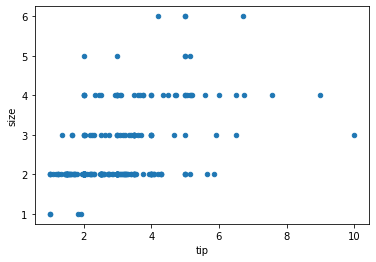

In [289]:
tips.plot.scatter(x = 'tip', y = 'size')

In [290]:
tips[['size', 'tip']].corr()

,size,tip
size,1.000000,0.489299
tip,0.489299,1.000000


The tips and size of the group have positive correlation. It means the tips is more when the size of the group is larger. 

### Question 6

In [291]:
np.mean(tips.smoker == "Yes")

0.38114754098360654

38.11% of people are smoking

### Question 7

In [303]:
day_tip_avg = []

In [304]:
day_tip = 0
for i in range(tips.shape[0]):
    current_day = tips.day[i]
    if i == 0:
        # first record in first day
        previous_day = current_day
        day_tip = tips.tip[0]
    else:
        if previous_day == current_day:
            day_tip =+ tips.tip[i]
            if i == tips.shape[0]-1:
                # calculate the average tips for last day
                day_tip_avg.append(np.mean(day_tip))
        else:
            # previous day ended, so calculate the average tips for previous day
            day_tip_avg.append(np.mean(day_tip))
            # reset for the current day
            previous_day = current_day
            # restart the tip count for the day
            day_tip = tips.tip[i]

Text(0, 0.5, 'Average tip')

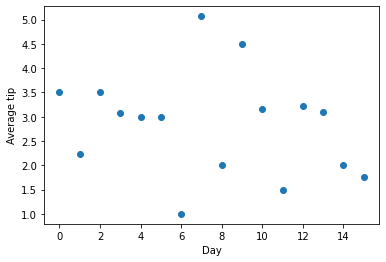

In [308]:
plt.scatter(x = list(range(len(day_tip_avg))), y = day_tip_avg)
plt.xlabel("Day")
plt.ylabel("Average tip")

The tips did not increase with time in each day. 

### Question 8

In [315]:
# correlation matrix for non-smoker
tips[tips['smoker'] == "No"][['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.822183
tip,0.822183,1.000000


In [316]:
# correlation matrix for smoker
tips[tips['smoker'] == "Yes"][['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.488218
tip,0.488218,1.000000


Yes, the correlation between meal prices and tips are difference from smokers and non-smokers. For smokers, the correlation is 0.4882. For non-smokers, the correlation is 0.8222. 